<a href="https://colab.research.google.com/github/HaydenLee0927/Baseball-Experiments/blob/main/batted_balls_kde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
!pip install pybaseball
from pybaseball import statcast
from pybaseball import playerid_lookup
from pybaseball import statcast_pitcher
from pybaseball import statcast_batter
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
playerid_lookup('judge')

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,judge,aaron,592450,judga001,judgeaa01,15640,2016.0,2024.0
1,judge,joe,116786,judgj101,judgejo01,1006644,1915.0,1934.0


In [60]:
df = statcast_batter('2024-01-01', '2024-12-31', 592450)

Gathering Player Data


<Figure size 800x600 with 0 Axes>

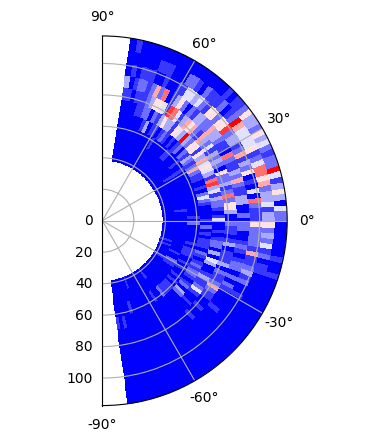

In [61]:
df_filtered = pd.DataFrame({"launch_angle": df["launch_angle"], "launch_speed": df["launch_speed"]})
df_filtered = df_filtered.dropna()

angles_rad = np.deg2rad(df_filtered["launch_angle"])
radii = df_filtered["launch_speed"]

num_angle_bins = 90
num_radius_bins = 10

# Create 2D histogram
hist, angle_edges, radius_edges = np.histogram2d(
    angles_rad, radii, bins=[num_angle_bins, num_radius_bins]
)

angle_centers = (angle_edges[:-1] + angle_edges[1:]) / 2
radius_centers = (radius_edges[:-1] + radius_edges[1:]) / 2

plt.figure(figsize=(8, 6))
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

theta, r = np.meshgrid(angle_centers, radius_centers)
pc = ax.pcolormesh(theta, r, hist.T, cmap='bwr')

ax.set_thetamin(-90)  # Start from 4th quadrant
ax.set_thetamax(90)   # End at 1st quadrant

plt.show()


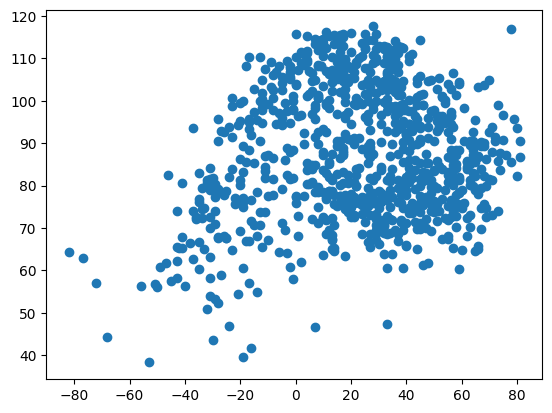

In [62]:
df_launch = pd.DataFrame({"launch_angle": df["launch_angle"], "launch_speed": df["launch_speed"]})
df_launch = df_launch.dropna()
plt.scatter(df_launch["launch_angle"], df_launch["launch_speed"])
plt.show()

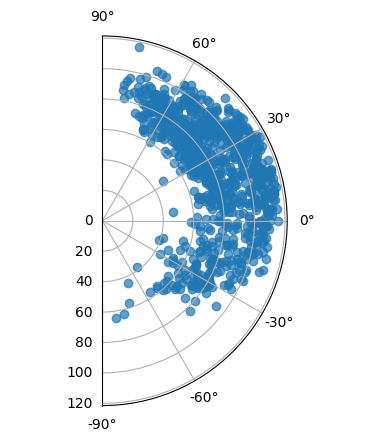

In [63]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

ax.scatter(np.deg2rad(df_launch["launch_angle"]), df_launch["launch_speed"], alpha=0.7)
ax.set_thetamax(90)
ax.set_thetamin(-90)

plt.show()

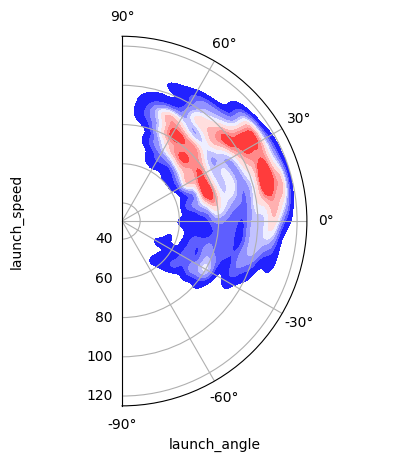

In [64]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
sns.kdeplot(x = np.deg2rad(df_launch["launch_angle"]), y = df_launch["launch_speed"], cmap = "bwr", fill = True, bw_adjust= 0.5, ax = ax)
ax.set_thetamax(90)
ax.set_thetamin(-90)
plt.show()